In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../../../data/titanic_train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
print('Процент выживших: ~', int(df['Survived'].mean()*100),'%' )

Процент выживших: ~ 38 %


In [54]:
print('\nДоля выживших детей:')
print(df[(df['Age'] > 0) & (df['Age'] < 12)]['Survived'].mean())
print('\nДоля выживших подростков:')
print(df[(df['Age'] >= 12) & (df['Age'] < 21)]['Survived'].mean())
print('\nДоля выживших взрослых:')
print(df[(df['Age'] >= 21) & (df['Age'] < 75)]['Survived'].mean())
print('\nДоля выживших престарелых:')
print(df[(df['Age'] >= 75)]['Survived'].mean())


Доля выживших детей:
0.5735294117647058

Доля выживших подростков:
0.38392857142857145

Доля выживших взрослых:
0.3883677298311445

Доля выживших престарелых:
1.0


In [16]:
print('Таблица сопряженности для порта и класса. \n')
pd.crosstab(df.Pclass, df.Embarked, normalize=False)

Таблица сопряженности для порта и класса. 



Embarked,0.0,1.0,2.0
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [17]:
print("Основную статистика по классам ")
numeric = ['Age' , 'Fare']
df.groupby("Pclass")[numeric].describe()

Основную статистика по классам 


Age                                                       Fare  \
        count       mean        std   min   25%   50%   75%   max  count   
Pclass                                                                     
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  216.0   
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  184.0   
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  491.0   

                                                                      
             mean        std  min       25%      50%   75%       max  
Pclass                                                                
1       84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292  
2       20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000  
3       13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

Сколько тратят пассажиры из разных городов


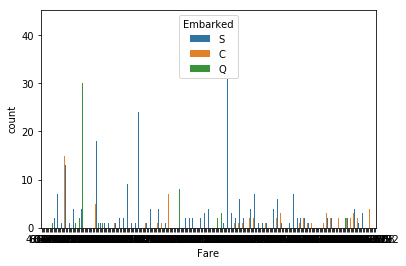

In [4]:
print('Сколько тратят пассажиры из разных городов')
sns.countplot(x = 'Fare', hue='Embarked', data = df)

In [5]:
#Самые обеспеченные граждане из Southampton как мы видим

Доля выживших среди мужчин и женщин


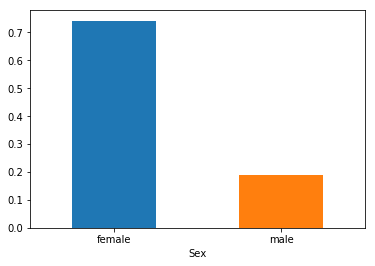

In [6]:
print('Доля выживших среди мужчин и женщин')
df.groupby('Sex')['Survived'].mean().plot(kind="bar", rot=0)

In [7]:
#<<Сначала женщины и дети!!!>>
#Неудивительно что в относительной мере выжило больше женщин 

Корреляционная матрица для колличественных признаков таких как возраст , пол, класс, денежные расходы, город, количество родственников на борту


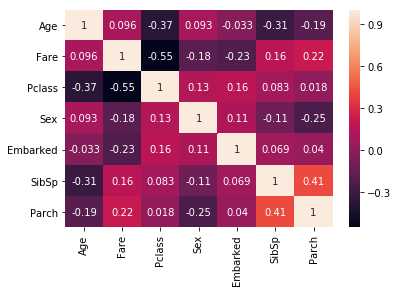

In [8]:
print('Корреляционная матрица для колличественных признаков таких как возраст , пол, класс, денежные расходы, город, количество родственников на борту')
df['Sex']=df['Sex'].map({ 'male' : 1, 'female' : 0})
df['Embarked']=df['Embarked'].map({ 'C' : 0, 'Q' : 1, 'S' : 2 })
matrix = df[['Age','Fare','Pclass','Sex', 'Embarked', 'SibSp','Parch']].corr()
sns.heatmap(matrix, annot=True)

In [9]:
# из heatmap'а можем заметить 2 пары коррелирующих признакоков
# 1 - чем класс ниже ( лучше ) , чем выше платежеспособность пассажира
# 2 - число братьев/сестер или супругов положительно коррелируют с количеством родителей/детей

Количество выживших и не выживших относительно классов


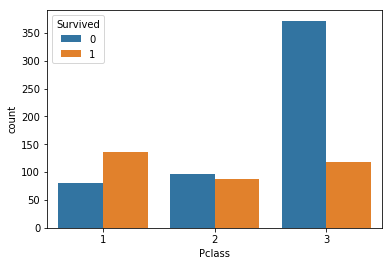

In [10]:
print("Количество выживших и не выживших относительно классов")
sns.countplot(x='Pclass', hue='Survived', data=df)

In [11]:
#наибольшее количество пассажиров были мужчины. Доля выживших 
#среди женщин намного больше, чем у мужчин. Наибольшее число 
#пассажиров путешествовало 3 классом, в нем же наблюдаятся самая большая 
#доля погибших. Самый большой шанс выжить наблюдается у пассажиров 
#1 класса

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


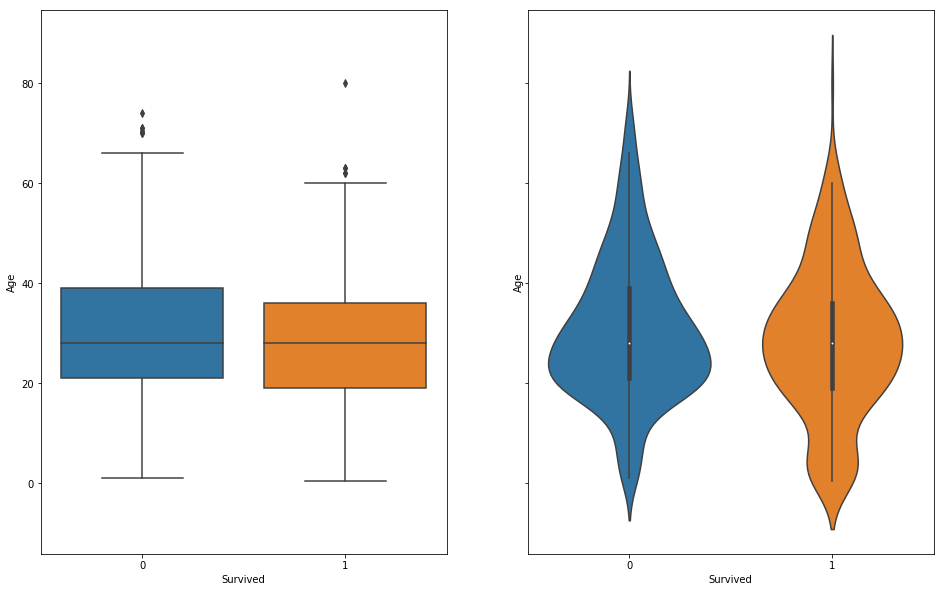

In [15]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,10))
sns.boxplot(x='Survived', y='Age', data=df, ax=axes[0])
sns.violinplot(x='Survived', y='Age', data=df, ax=axes[1])

In [13]:
#Возраст среди погибщих и среди выживщих имеют схожую количественную характеристику
#Но заметно небольшое преобладание выживших при маленьком возрасте
#Тем не менее можно смело увтерждать, что показатель возраста не даёт никаких гарантий на успех/провал

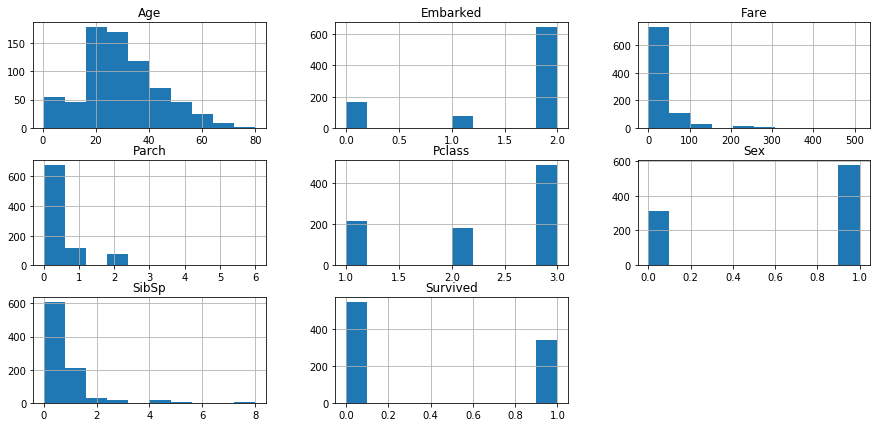

In [46]:
usefullcolumns = list( set(df.columns)-set(['Name', 'Ticket', 'Cabin', 'PassengerId']) )
# sns.pairplot( usefullcolumns ) , hue='Sex');
df[usefullcolumns].hist(figsize=(15,7));

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,

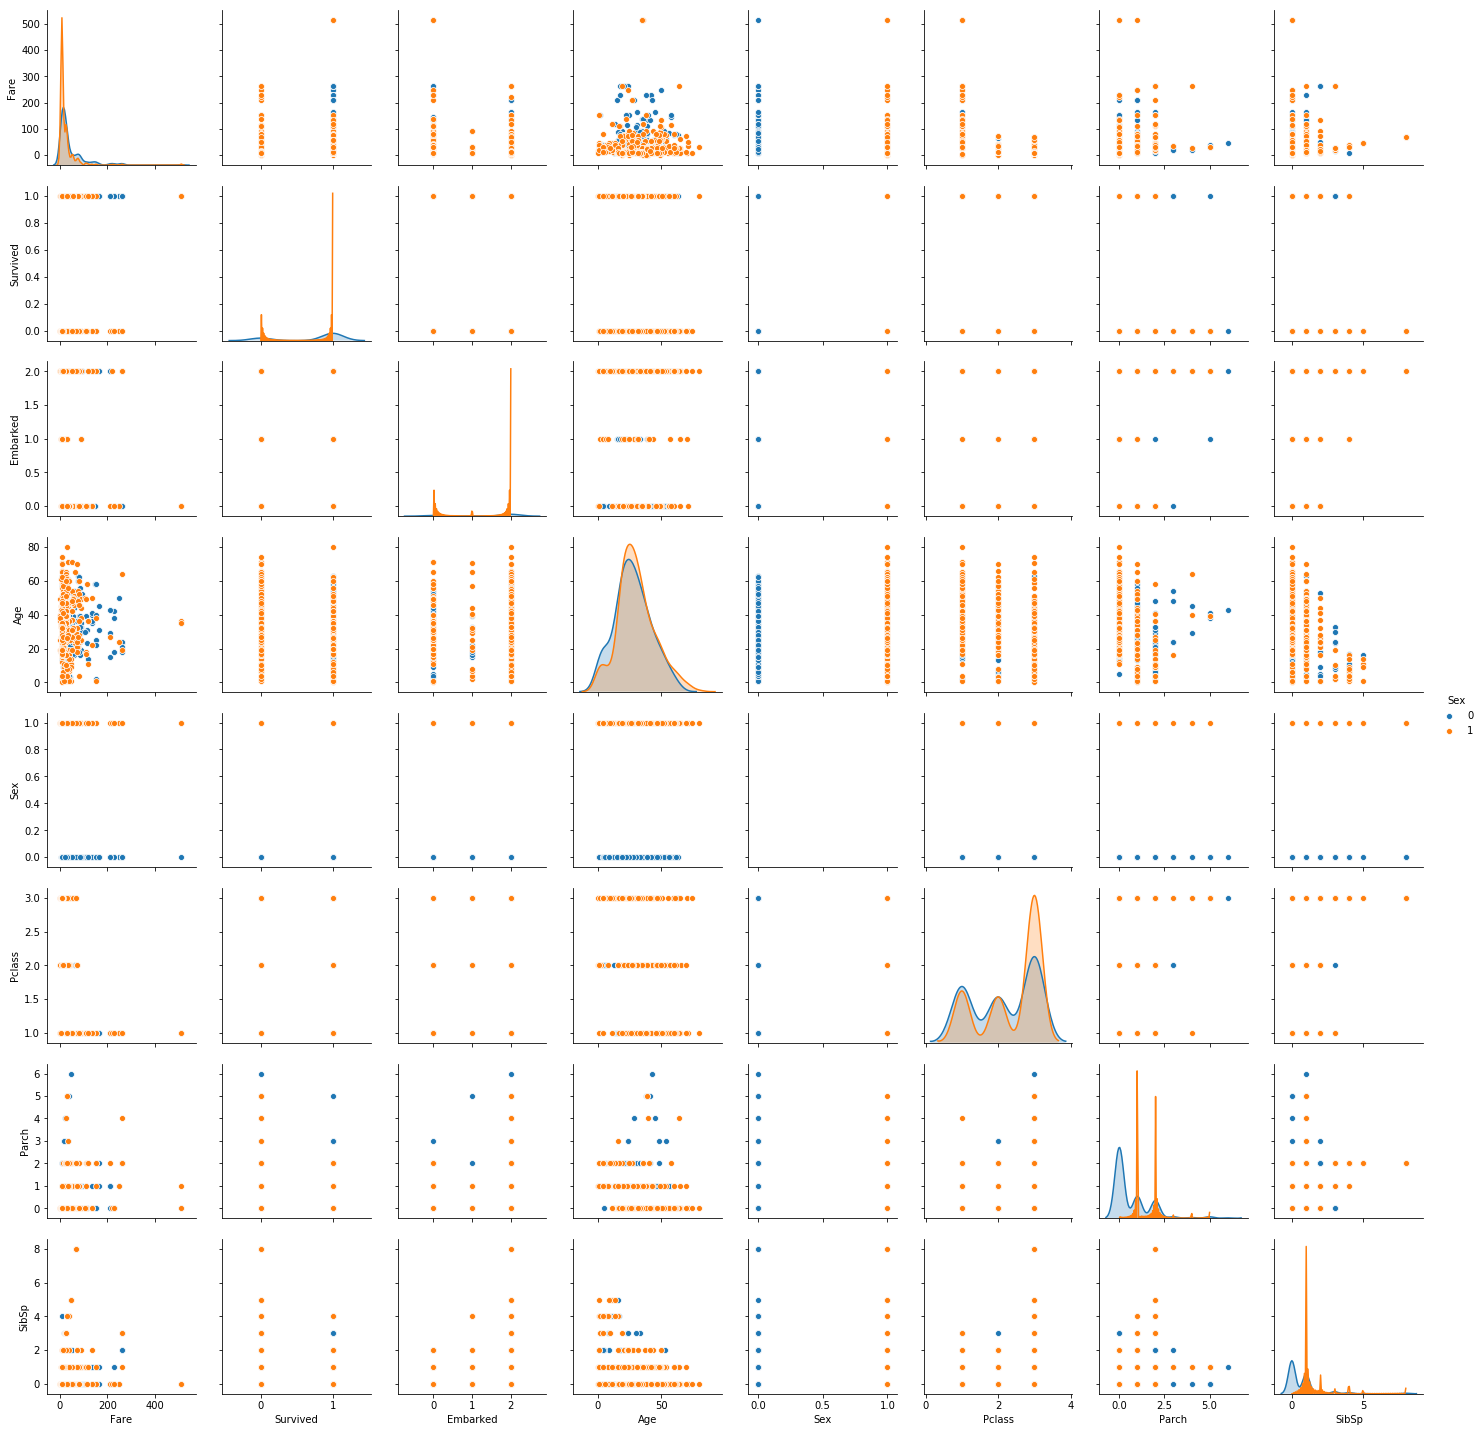

In [50]:
sns.pairplot(df[usefullcolumns ] , hue='Sex');

Подглядывание в n-мерное пространство с t-SNE


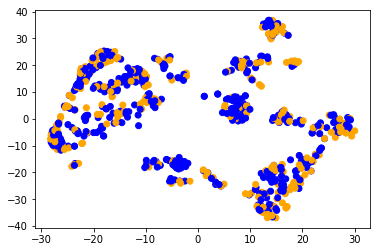

In [19]:
print("Подглядывание в n-мерное пространство с t-SNE")

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

x = df.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1)
x['Fare'] = pd.factorize(x['Fare'])[0]
x['Pclass'] = pd.factorize(x['Pclass'])[0]
x = x.dropna()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(x_scaled)
plt.figure()
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1],
            c=df['Survived'].map({0: 'blue', 1: 'orange'}));